In [413]:
import numpy as np
import pandas as pd

In [10]:
pop = {'Nevada':{2001: 2.4, 2002: 2.9},
       "Ohio": {2000: 1.5, 2001: 1.7, 2002:3.6}}

frame3 = pd.DataFrame(pop, index=[2000,2001,2002])

In [11]:
frame3.index.name = 'year'
frame3.columns.name = 'state'

In [12]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [13]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [15]:
index[1:] # index is immutible 

Index(['b', 'c'], dtype='object')

In [16]:
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [17]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)

In [18]:
obj2.index is labels

True

In [19]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [20]:
'Nevada' in frame3.columns

True

### Reindex

In [24]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [25]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])

In [26]:
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [27]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [33]:
obj3.reindex(range(7), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
6    yellow
dtype: object

In [38]:
frame = pd.DataFrame(np.arange(9).reshape(3,3),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])

In [39]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [41]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])

In [42]:
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [43]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [53]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])

In [56]:
obj

a    0.0
b    1.0
d    3.0
dtype: float64

In [55]:
obj.drop(['c', 'e'], inplace=True) # inplace
# drop default axis=0; axis=1>>axis='columns'


In [58]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])

In [59]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [61]:
obj['b'] # obj['b']== obj[1]

1.0

In [62]:
obj[1]

1.0

In [63]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [66]:
obj[[1,3]]

b    1.0
d    3.0
dtype: float64

In [69]:
obj[['a', 'c']]

a    0.0
c    2.0
dtype: float64

In [71]:
data = pd.DataFrame(np.arange(16).reshape(4,4),
                    index=['Ohio', "Colorado", 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [72]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [73]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [80]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [82]:
data.loc['Ohio', ['one', 'four']] # loc string

one     0
four    3
Name: Ohio, dtype: int64

In [84]:
data.iloc[1, [3,2,1]]

four     7
three    6
two      5
Name: Colorado, dtype: int64

In [85]:
s1 = pd.Series([7.7, -2.4, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.3, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
s1 + s2

a    5.4
c    1.2
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [86]:
df1 = pd.DataFrame(np.arange(9.).reshape(3,3),
                  columns=list('bcd'),
                  index=['Ohio', 'Texas', 'Oregon'])

df2 = pd.DataFrame(np.arange(12.).reshape(4,3),
                  columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [88]:
print(df1)
print(df2)
print(df1+df2)

          b    c    d
Ohio    0.0  1.0  2.0
Texas   3.0  4.0  5.0
Oregon  6.0  7.0  8.0
          b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0
           b   c     d   e
Ohio     3.0 NaN   6.0 NaN
Oregon  15.0 NaN  18.0 NaN
Texas    9.0 NaN  12.0 NaN
Utah     NaN NaN   NaN NaN


In [25]:
text = 'a,b,c,d,message\n1,2,3,4,hello\n5,6,7,8,world\n9,10,11,12,foo\n'
with open('./example.csv','w') as f:
    f.write(text)

In [26]:
pd.read_table('./example.csv', sep=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### Header

In [28]:
text = '1,2,3,4,hello\n5,6,7,8,world\n9,10,11,12,foo\n'
with open('./example1.csv','w') as f:
    f.write(text)

In [29]:
pd.read_table('./example1.csv', sep=',', header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [19]:
pd.read_table('./example1.csv', sep=',', names=['a','aa','aaa','aaaa','aaaaa'])

,a,aa,aaa,aaaa,aaaaa
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [33]:
names = ['a', 'b', 'c', 'd', 'message']
df = pd.read_csv('./example1.csv', names=names, index_col='message')

In [34]:
df

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [35]:
df.columns.name = 'col_index'

In [39]:
df.to_csv('./example2.csv')

In [120]:
text = ['key1, key2, value1, value2\n',
'one, a, 1, 2\n',
'one, b, 3, 4\n',
'one, c, 5, 6\n',
'one, d, 7, 8\n',
'two, a, 9, 10\n',
'two, b, 11, 12\n',
'two, c, 13, 14\n',
'two, d, 15, 16\n',]

In [121]:
with open('example3.csv','w') as f:
    f.writelines(text)

In [125]:
df = pd.read_csv('example3.csv',index_col=['key1'])
df

,key2,value1,value2
key1,,,
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


In [126]:
import requests

In [128]:
url = 'http://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
resp

<Response [200]>

In [129]:
data = resp.json()

In [141]:
issues = pd.DataFrame(data, columns = ['number', 'title', 'labels', 'state'])

In [143]:
import sqlite3

In [144]:
query = """
        CREATE TABLE TEST
        (a VARCHAR(20), 
         b VARCHAR(20),
         c REAL, 
         d INTEGER);
        """

In [146]:
con = sqlite3.connect('mydata.sqlite')

In [147]:
con.execute(query)

In [148]:
con.commit()

In [150]:
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ("Sacramento", 'California', 1.7, 5)]

In [153]:
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"

In [154]:
con.executemany(stmt, data)

In [155]:
con.commit()

In [156]:
cursor = con.execute('select * from test')

In [157]:
rows = cursor.fetchall()

In [158]:
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [159]:
cursor.description

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None))

In [160]:
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [167]:
from numpy import nan as NA

In [168]:
data = pd.Series([1, NA, 3.5, NA, 7])

In [178]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [180]:
data.notnull()

0     True
1    False
2     True
3    False
4     True
dtype: bool

In [181]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [183]:
data = pd.DataFrame([[1, 6.5, 3],
                     [1., NA, NA],
                     [NA, NA, NA],
                     [NA, 6.5, 3]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [185]:
data.dropna() # has na: del row

,0,1,2
0,1.0,6.5,3.0


In [189]:
data.dropna(how='all') # if all na: del row

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [192]:
data[4] = NA

In [193]:
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [198]:
data.dropna(how='all', axis='columns')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [200]:
df = pd.DataFrame(np.random.randn(7,3))
df

,0,1,2
0,1.429202,-0.217963,0.534746
1,0.493622,0.079663,-0.292454
2,0.142724,0.808943,0.034158
3,1.549454,0.130589,1.190689
4,0.706126,0.329586,-0.572399
5,0.320630,-0.304482,-1.002254
6,0.383684,-0.430505,-0.176302


In [225]:
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,1.429202,NaN,NaN
1,0.493622,NaN,NaN
2,0.142724,NaN,0.034158
3,1.549454,NaN,1.190689
4,0.706126,0.329586,-0.572399
5,0.320630,-0.304482,-1.002254
6,0.383684,-0.430505,-0.176302


In [229]:
df.dropna(thresh=2) # has value >=2

,0,1,2
2,0.142724,NaN,0.034158
3,1.549454,NaN,1.190689
4,0.706126,0.329586,-0.572399
5,0.320630,-0.304482,-1.002254
6,0.383684,-0.430505,-0.176302


In [230]:
df.fillna(0.)

,0,1,2
0,1.429202,0.000000,0.000000
1,0.493622,0.000000,0.000000
2,0.142724,0.000000,0.034158
3,1.549454,0.000000,1.190689
4,0.706126,0.329586,-0.572399
5,0.320630,-0.304482,-1.002254
6,0.383684,-0.430505,-0.176302


In [233]:
df.fillna({1:0.5, 2:0})

,0,1,2
0,1.429202,0.500000,0.000000
1,0.493622,0.500000,0.000000
2,0.142724,0.500000,0.034158
3,1.549454,0.500000,1.190689
4,0.706126,0.329586,-0.572399
5,0.320630,-0.304482,-1.002254
6,0.383684,-0.430505,-0.176302


In [244]:
_ = df.fillna(0, inplace=True)

In [245]:
df = pd.DataFrame(np.random.randn(6, 3))

In [246]:
df.iloc[2:, 1] = NA

In [247]:
df.iloc[4:, :] = NA

In [249]:
df.fillna(method='ffill') # use final value to fill

,0,1,2
0,0.277984,0.375181,0.551556
1,0.426216,2.494872,2.046631
2,-0.213979,2.494872,0.106389
3,0.439911,2.494872,0.293889
4,0.439911,2.494872,0.293889
5,0.439911,2.494872,0.293889


In [251]:
df.fillna(method='ffill', limit=2) # use final value to fill # max:2

,0,1,2
0,0.277984,0.375181,0.551556
1,0.426216,2.494872,2.046631
2,-0.213979,2.494872,0.106389
3,0.439911,2.494872,0.293889
4,0.439911,NaN,0.293889
5,0.439911,NaN,0.293889


In [255]:
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean()) # use mean to fill data

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

In [258]:
data = pd.DataFrame({'k1': ['one', 'two']*3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [259]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [262]:
data.drop_duplicates() # to avoid linear independence

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [266]:
data['v1'] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [265]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [267]:
data.drop_duplicates(['k2'])

,k1,k2,v1
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


In [268]:
data.drop_duplicates(['v1'])

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [270]:
data.drop_duplicates(['k1', 'k2'])

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5


In [272]:
data.drop_duplicates(['k1', 'k2'], keep='last') # keep the lastest

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


In [274]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [277]:
data.replace([-999., -1000.], [NA, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [286]:
data.replace({-999:NA, -1000:0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [288]:
data = pd.DataFrame(np.arange(12).reshape(3,4),
                    index=['Ohio', 'Carlorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [296]:
transform = lambda x: x[:4].upper()

In [295]:
data.index.map(transform)

Index(['OHIO', 'CARLORADO', 'NEW YORK'], dtype='object')

In [297]:
data.index = data.index.map(transform)

In [298]:
data

,one,two,three,four
OHIO,0,1,2,3
CARL,4,5,6,7
NEW,8,9,10,11


In [301]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Carl,4,5,6,7
New,8,9,10,11


In [306]:
data.rename(index={'OHIO':'INDIANA'}, inplace=True)

In [307]:
data

,one,two,three,four
INDIANA,0,1,2,3
CARL,4,5,6,7
NEW,8,9,10,11


In [316]:
df = pd.DataFrame(np.arange(5 * 4).reshape(5, 4))

In [325]:
sampler = np.random.permutation(5)
sampler

array([3, 1, 2, 4, 0])

In [321]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [326]:
df.take(sampler, axis=0)

,0,1,2,3
3,12,13,14,15
1,4,5,6,7
2,8,9,10,11
4,16,17,18,19
0,0,1,2,3


In [332]:
df.sample(2, axis=1)

,3,1
0,3,1
1,7,5
2,11,9
3,15,13
4,19,17


In [335]:
choices = pd.Series([5, 7, -1, 6, 4])
draws = choices.sample(n=10, replace=True)
draws

3    6
4    4
2   -1
0    5
2   -1
0    5
2   -1
4    4
2   -1
1    7
dtype: int64

In [336]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [337]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [344]:
dummy = pd.get_dummies(df.key, prefix='key')

In [345]:
dummy

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [357]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('./ml-1m/movies.dat', encoding='cp1252', sep='::', header=None, names=mnames)
movies[:10]

/Users/xiezhengqi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [385]:
all_genres = []
for x in movies['genres']:
    all_genres.extend(x.split('|'))
    
genres = pd.unique(all_genres)
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

## indicator

In [395]:
zero_matrix = np.zeros((len(movies), len(genres)))

In [399]:
dummies = pd.DataFrame(zero_matrix, columns=genres)
dummies

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [404]:
gen = movies.genres[0]

In [405]:
gen.split('|')

['Animation', "Children's", 'Comedy']

In [406]:
dummies.columns.get_indexer(gen.split('|'))

array([0, 1, 2])

In [411]:
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

movies_windic = movies.join(dummies.add_prefix('Genere_'))

In [412]:
movies_windic.iloc[0]

movie_id                                        1
title                            Toy Story (1995)
genres                Animation|Children's|Comedy
Genere_Animation                                1
Genere_Children's                               1
Genere_Comedy                                   1
Genere_Adventure                                0
Genere_Fantasy                                  0
Genere_Romance                                  0
Genere_Drama                                    0
Genere_Action                                   0
Genere_Crime                                    0
Genere_Thriller                                 0
Genere_Horror                                   0
Genere_Sci-Fi                                   0
Genere_Documentary                              0
Genere_War                                      0
Genere_Musical                                  0
Genere_Mystery                                  0
Genere_Film-Noir                                0


In [414]:
frame = pd.DataFrame({'a': range(7),
                      'b': range(7,0,-1),
                      'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [415]:
frame2 = frame.set_index(['c', 'd'])

In [416]:
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [417]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [419]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


In [421]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})

df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})

In [422]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [423]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [424]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [425]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [428]:
df3 = pd.DataFrame({'1key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})

pd.merge(df3, df4, left_on='1key', right_on='rkey')

,1key,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [430]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [433]:
left1 = pd.DataFrame({'key':['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [434]:
right1 = pd.DataFrame({'group_val': [3.5, 7]},
                      index=['a', 'b'])
right1

,group_val
a,3.5
b,7.0


In [436]:
pd.merge(left1,right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [442]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                     'key2': [2000, 2001, 2002, 2001, 2002],
                     'data': np.arange(5.)})

lefth

,key1,key2,data
0,Ohio,2000,0.0
1,Ohio,2001,1.0
2,Ohio,2002,2.0
3,Nevada,2001,3.0
4,Nevada,2002,4.0


In [443]:
righth = pd.DataFrame(np.arange(12).reshape((6,2)),
                     index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                           [2001, 2000, 2000, 2000, 2001, 2000]],
                     columns=['event1', 'event2'])
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2000      10      11

In [444]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True, how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
0,Ohio,2000,0.0,10.0,11.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,NaN,NaN
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [448]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [449]:
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13., 14.]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [450]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [451]:
arr = np.arange(12).reshape((3,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [454]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [456]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [457]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [462]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [464]:
s4 = pd.concat([s1, s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [467]:
pd.concat([s1, s4], axis=1, join='outer')

,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [469]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

In [470]:
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [473]:
result.unstack(level=0)

,one,two,three
a,0.0,0.0,NaN
b,1.0,1.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [474]:
df1 = pd.DataFrame(np.arange(6).reshape((3,2)),
                   index=['a', 'b', 'c'],
                   columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2),
                   index=['a', 'c'],
                   columns=['three', 'four'])

In [478]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [480]:
pd.concat({'aaa': df1, 'bbb':df2},
          axis=1)

aaa       bbb     
  one two three four
a   0   1   5.0  6.0
b   2   3   NaN  NaN
c   4   5   7.0  8.0

In [484]:
from numpy import nan as NA

In [486]:
a = pd.Series([NA, 2.5, 0., 3.5, 4.5, NA],
              index=list('fedcba'))

b = pd.Series([0., NA, 2., NA, NA, 5.],
              index=list('abcdef'))

In [487]:
a

f    NaN
e    2.5
d    0.0
c    3.5
b    4.5
a    NaN
dtype: float64

In [489]:
b

a    0.0
b    NaN
c    2.0
d    NaN
e    NaN
f    5.0
dtype: float64

In [492]:
np.where(pd.isnull(a), b, a)

array([0. , 2.5, 0. , 3.5, 4.5, 5. ])

In [493]:
b.combine_first(a)

a    0.0
b    4.5
c    2.0
d    0.0
e    2.5
f    5.0
dtype: float64

In [498]:
data = pd.DataFrame(np.arange(6).reshape(2,3),
                   index=pd.Index(['Ohio', 'Colorado'], name='state'),
                   columns=pd.Index(['One', 'Two', 'Three'], name='number'))
data

number,One,Two,Three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [499]:
result = data.stack()

In [500]:
result

state     number
Ohio      One       0
          Two       1
          Three     2
Colorado  One       3
          Two       4
          Three     5
dtype: int64

In [518]:
result.unstack(0)

state,Ohio,Colorado
number,,
One,0,3
Two,1,4
Three,2,5


In [519]:
result.unstack('number')

number,One,Two,Three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [521]:
s1 = pd.Series([0, 1, 2 ,3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['One', 'Two'])

In [522]:
data2

One  a    0
     b    1
     c    2
     d    3
Two  c    4
     d    5
     e    6
dtype: int64

In [527]:
data2.unstack(1).stack()

One  a    0.0
     b    1.0
     c    2.0
     d    3.0
Two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [529]:
df = pd.DataFrame({'left': result, 'right': result+5},
                  columns=pd.Index(['left', 'right'], name ='side'))

In [530]:
df

side             left  right
state    number             
Ohio     One        0      5
         Two        1      6
         Three      2      7
Colorado One        3      8
         Two        4      9
         Three      5     10

In [531]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
One       0        3     5        8
Two       1        4     6        9
Three     2        5     7       10

In [532]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
One    left          3     0
       right         8     5
Two    left          4     1
       right         9     6
Three  left          5     2
       right        10     7

In [533]:
data = pd.read_csv('./macrodata.csv')

In [534]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [536]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')

In [538]:
columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')

In [541]:
data = data.reindex(columns=columns)

In [561]:
data.index = periods.to_timestamp('D','end')

In [562]:
ldata = data.stack().reset_index().rename(columns={0:'value'})

In [563]:
ldata

,date,item,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.370
605,2009-06-30 23:59:59.999999999,unemp,9.200
606,2009-09-30 23:59:59.999999999,realgdp,12990.341
607,2009-09-30 23:59:59.999999999,infl,3.560


In [590]:
%matplotlib inline
import matplotlib.pyplot as plt

In [591]:
data = np.arange(10)

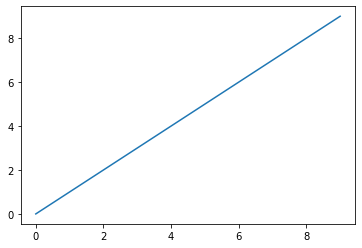

In [592]:
plt.plot(data)

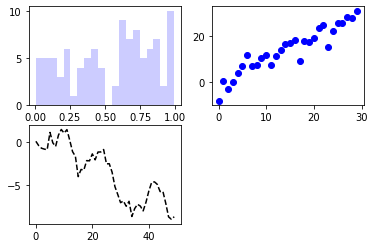

In [612]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.rand(100), bins=20, color='b', alpha=0.2)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30), color='b')

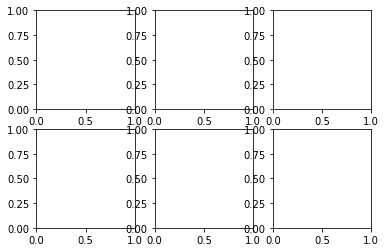

In [613]:
fig, axes = plt.subplots(2, 3)

In [614]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd564411810>,
      dtype=object)